In this project, I am analyzing Historical Weather Data by manipulating dataframe and creating different visualizations.

**Dataset Collection**

I have used used API to scrape hourly historical weather data for Bloomington city from OpenWeatherMap. OpenWeatherMap provides current weather data, forecasts, historical data, and more.

In [2]:
# Importing Libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import rcParams

Unix time is a widely used system for representing time in computing, and it's often used by APIs as a standard format for specifying timestamps.

When using an API that requires a start date in Unix time and UTC time zone, you would typically convert your desired start date to the corresponding Unix timestamp. So, the below start_date and end_date are in unix format

In [8]:
# specify the API endpoint and parameters
url = "https://history.openweathermap.org/data/2.5/history/city"
city_name = "Bloomington"
country_code = "US"
start_date = "1651377600" # May 01 2022 04:00:00
end_date = "1651982400"   # May 08 2022 04:00:00
api_key = "e5b20cb1ff62e8ee010b38ed28aa2935"

Parameters "q" and "type" specify the city name, country code, and type of weather data to retrieve (in this case, hourly weather data), and the parameters "start" and "end" specify the date range of the weather data to retrieve.

In [9]:
# send a GET request to the API endpoint with the specified parameters and token
response = requests.get(f"{url}?q={city_name},{country_code}&type=hour&start={start_date}&end={end_date}&appid={api_key}").json()

In [5]:
# create a DataFrame to store the weather data
weather_data = pd.DataFrame(columns=["Date", "Time", "Temperature", "Humidity", "Pressure","Feels_Like", "Min_Temp", "Max_Temp","Wind_Speed", "Wind_Degree","Wind_Gust","Main_Weather","Description"])

In [6]:
# iterate over the weather data in the response and add it to the DataFrame
for result in response["list"]:
    
    date_time = pd.to_datetime(result["dt"], unit="s")
    date = date_time.date()
    time = date_time.time()
    temperature = result["main"]["temp"]
    humidity = result["main"]["humidity"]
    pressure = result["main"]["pressure"]
    feels_like = result["main"]["feels_like"]
    temp_min = result["main"]["temp_min"]
    temp_max = result["main"]["temp_max"]
    wind_speed = result["wind"]["speed"]
    wind_deg = result["wind"]["deg"]
    wind_gust = result["wind"].get("gust", 0)
    main_weather = result["weather"][0]["main"]
    description = result["weather"][0]["description"]
    
    weather_data = weather_data.append({
        "Date": date,
        "Time": time,
        "Temperature": temperature,
        "Humidity": humidity,
        "Pressure": pressure,
        "Feels_Like": feels_like,
        "Min_Temp": temp_min,
        "Max_Temp": temp_max,
        "Wind_Speed": wind_speed,
        "Wind_Degree": wind_deg,
        "Wind_Gust": wind_gust,
        "Main_Weather": main_weather,
        "Description": description
    }, ignore_index=True)

In [7]:
# print the weather data DataFrame
print(weather_data)

           Date      Time  Temperature Humidity Pressure  Feels_Like  \
0    2022-05-01  04:00:00       292.54       83      998      292.70   
1    2022-05-01  05:00:00       292.36       85      998      292.56   
2    2022-05-01  06:00:00       291.75       88     1007      291.96   
3    2022-05-01  07:00:00       291.01       88      999      291.15   
4    2022-05-01  08:00:00       289.61       87     1001      289.58   
..          ...       ...          ...      ...      ...         ...   
164  2022-05-08  00:00:00       290.41       53     1003      289.58   
165  2022-05-08  01:00:00       289.27       51     1013      288.27   
166  2022-05-08  02:00:00       287.27       54     1014      286.15   
167  2022-05-08  03:00:00       285.51       67      999      284.55   
168  2022-05-08  04:00:00       284.54       71      996      283.59   

     Min_Temp  Max_Temp  Wind_Speed Wind_Degree  Wind_Gust Main_Weather  \
0      290.53    293.51        2.68         197       4.47  

In [8]:
weather_data.head()

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,2022-05-01,04:00:00,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47,Clouds,overcast clouds
1,2022-05-01,05:00:00,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92,Clouds,overcast clouds
2,2022-05-01,06:00:00,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31,Clouds,overcast clouds
3,2022-05-01,07:00:00,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92,Rain,light rain
4,2022-05-01,08:00:00,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00,Clouds,scattered clouds


In [3]:
# Reading the data file we scraped
weather_data = pd.read_csv("weather_new.csv")

In [4]:
weather_data.head()

,Unnamed: 0,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,0,2022-05-01,04:00:00,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47,Clouds,overcast clouds
1,1,2022-05-01,05:00:00,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92,Clouds,overcast clouds
2,2,2022-05-01,06:00:00,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31,Clouds,overcast clouds
3,3,2022-05-01,07:00:00,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92,Rain,light rain
4,4,2022-05-01,08:00:00,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00,Clouds,scattered clouds


In [5]:
weather_data = weather_data.drop('Unnamed: 0', axis=1)


In [6]:
weather_data.head()

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,2022-05-01,04:00:00,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47,Clouds,overcast clouds
1,2022-05-01,05:00:00,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92,Clouds,overcast clouds
2,2022-05-01,06:00:00,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31,Clouds,overcast clouds
3,2022-05-01,07:00:00,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92,Rain,light rain
4,2022-05-01,08:00:00,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00,Clouds,scattered clouds


In [7]:
# Checking for missing values
weather_data.isnull()

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,False,False,False,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
weather_data["Date"]= pd.to_datetime(weather_data["Date"])

In [10]:
weather_data.dtypes

Date            datetime64[ns]
Time                    object
Temperature            float64
Humidity                 int64
Pressure                 int64
Feels_Like             float64
Min_Temp               float64
Max_Temp               float64
Wind_Speed             float64
Wind_Degree              int64
Wind_Gust              float64
Main_Weather            object
Description             object
dtype: object

Humidity, Pressure and Wind_Degree have data type as object. I changed it to integer

In [11]:
weather_data['Humidity'] = weather_data['Humidity'].astype(str).astype(int)
weather_data['Pressure'] = weather_data['Pressure'].astype(str).astype(int)
weather_data['Wind_Degree'] = weather_data['Wind_Degree'].astype(str).astype(int)

In [12]:
weather_data.dtypes

Date            datetime64[ns]
Time                    object
Temperature            float64
Humidity                 int32
Pressure                 int32
Feels_Like             float64
Min_Temp               float64
Max_Temp               float64
Wind_Speed             float64
Wind_Degree              int32
Wind_Gust              float64
Main_Weather            object
Description             object
dtype: object

In [15]:
#Categorical variables:
categorical = weather_data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Time', 'Main_Weather', 'Description'], dtype='object')


In [16]:
#Quantitative variables:
quantitative = weather_data.select_dtypes(include = ["int32","float64"]).keys()
print(quantitative)

Index(['Temperature', 'Humidity', 'Pressure', 'Feels_Like', 'Min_Temp',
       'Max_Temp', 'Wind_Speed', 'Wind_Degree', 'Wind_Gust'],
      dtype='object')


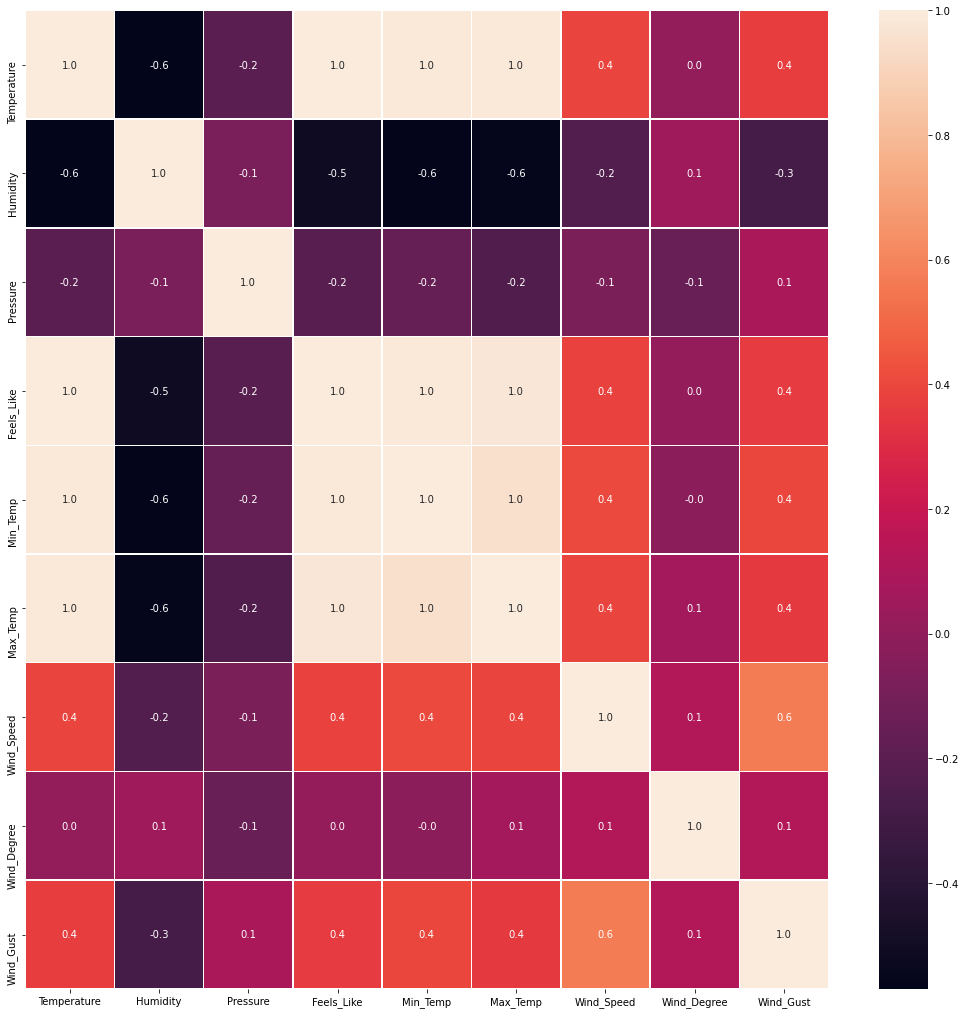

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(weather_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

I have plotted correlation between different attribures. We can see that Temperature, Feels_Like, Min_Temp, Max_Temp are positively correlated with each other.

Wind_Degree, Wind_Gust, Wind_Speed are positively correlated with each other.

Feels_Like and Humidity are negatively correlated.

The distribution of quantitative features of the dataset

In [18]:
weather_data[quantitative].describe()

,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,287.850059,78.958580,1004.934911,287.422604,286.825207,289.051834,3.142071,173.130178,3.991598
std,3.521014,11.931528,6.741081,3.730412,3.416332,3.727509,1.828333,111.489193,4.002811
min,279.120000,48.000000,990.000000,277.890000,277.930000,281.220000,0.000000,0.000000,0.000000
25%,285.750000,71.000000,1000.000000,285.170000,284.980000,286.270000,1.790000,84.000000,0.000000
50%,287.270000,82.000000,1005.000000,286.810000,286.220000,288.500000,2.680000,157.000000,3.130000
75%,289.980000,88.000000,1010.000000,289.580000,289.270000,291.780000,4.470000,267.000000,5.810000
max,296.720000,97.000000,1020.000000,296.800000,296.180000,297.530000,7.810000,360.000000,15.140000


**Visual Distribution of Each Quantitative Feature of Data**

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Pressure'}>],
       [<AxesSubplot:title={'center':'Feels_Like'}>,
        <AxesSubplot:title={'center':'Min_Temp'}>,
        <AxesSubplot:title={'center':'Max_Temp'}>],
       [<AxesSubplot:title={'center':'Wind_Speed'}>,
        <AxesSubplot:title={'center':'Wind_Degree'}>,
        <AxesSubplot:title={'center':'Wind_Gust'}>]], dtype=object)

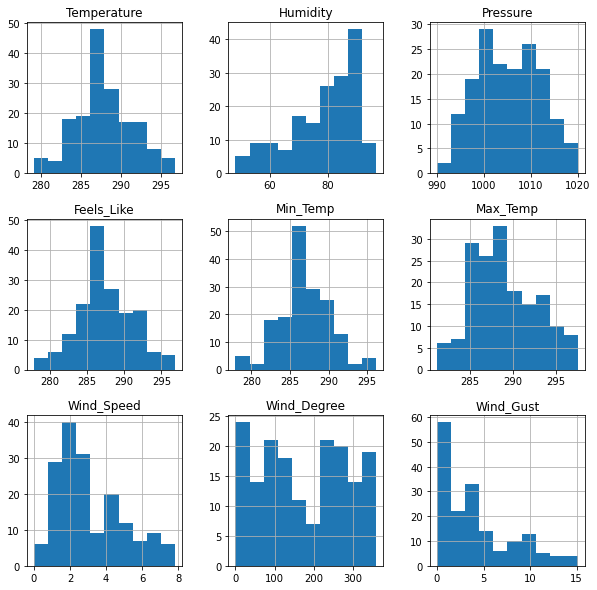

In [19]:
rcParams['figure.figsize'] = 10, 10
weather_data[quantitative].hist()

<AxesSubplot:xlabel='count', ylabel='Description'>

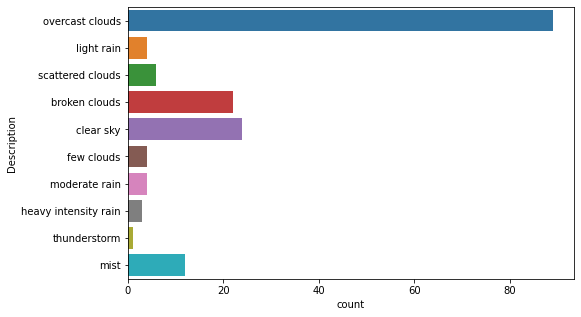

In [30]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=weather_data['Description'])

We see that for the period from 1st May to 8th May 2022, we mostly had overcast clouds

<AxesSubplot:xlabel='Main_Weather', ylabel='count'>

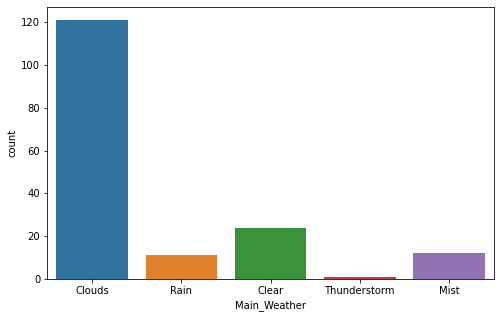

In [31]:
sns.countplot(x=weather_data['Main_Weather'])

The main weather in May was cloudy

<Figure size 1296x576 with 0 Axes>

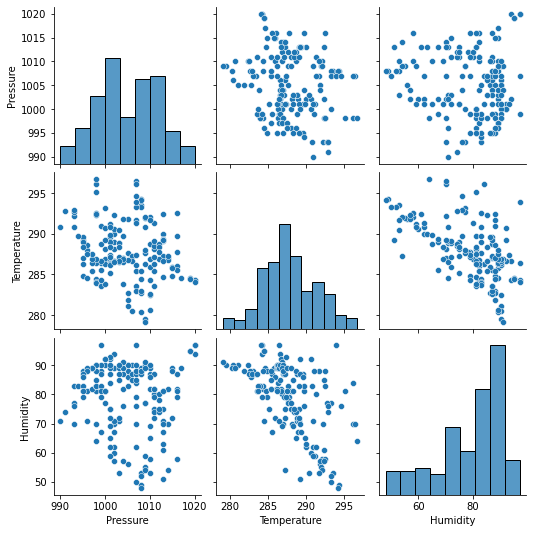

In [33]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(weather_data[['Pressure','Temperature', 'Humidity' ]])
plt.show()

The pairplot shows scatter plots of all possible combinations of the three variables: Pressure, Temperature, and Humidity. From the plot, we can see that:

There seems to be a negative correlation between Pressure and Temperature. As the temperature increases, the pressure seems to decrease, and vice versa.
There doesn't seem to be a strong correlation between Temperature and Humidity, although some clusters of data points are visible.
There doesn't seem to be a strong correlation between Pressure and Humidity, although some clusters of data points are visible.


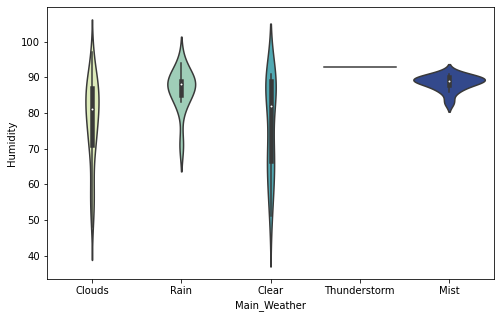

In [35]:
sns.violinplot(x="Main_Weather", y="Humidity", data=weather_data, palette="YlGnBu");

The violin plot shows the distribution of humidity for each main weather category. The width of the violin at a particular humidity level indicates the density of data points at that level.

From the graph, we can see that the humidity distribution for "Clear" weather is more spread out compared to other weather categories. The humidity distribution for "Clouds" and "Mist" weather is more concentrated in the middle range of humidity values, while the distribution for "Rain" weather is skewed towards higher humidity values.

From the violin plot, we can infer that when it was cloudy, humidity was mostly around 85. For rain, it is close to 90. For Mist, the humidity value is mostly 90



**Boxplots of some of the features with respect to Main_Weather**

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Main_Weather'>

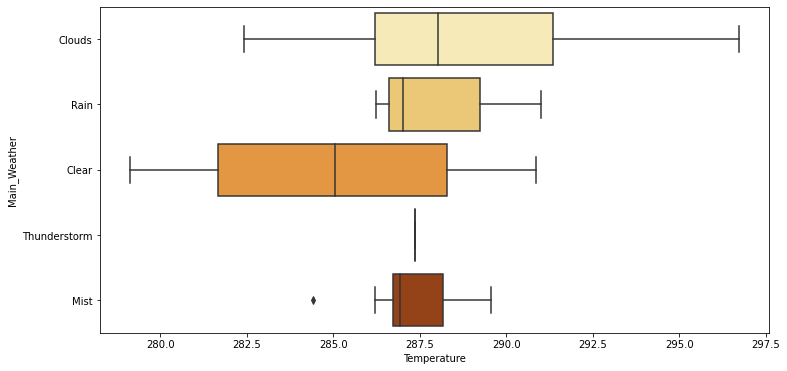

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot("Temperature","Main_Weather",data=weather_data,palette="YlOrBr")

'clear sky' weather condition has a wider range of temperatures compared to other weather conditions.

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Max_Temp', ylabel='Main_Weather'>

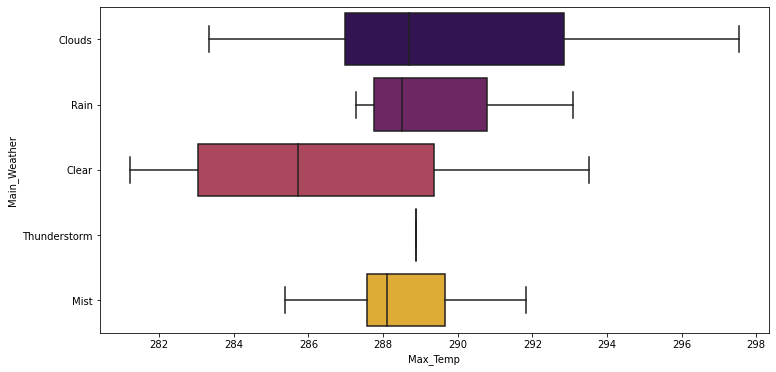

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot("Max_Temp","Main_Weather",data=weather_data,palette="inferno")

High Max_Temp can be ssen for cloudy weather and low Min_Temp can be seen for clear weather

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Speed', ylabel='Main_Weather'>

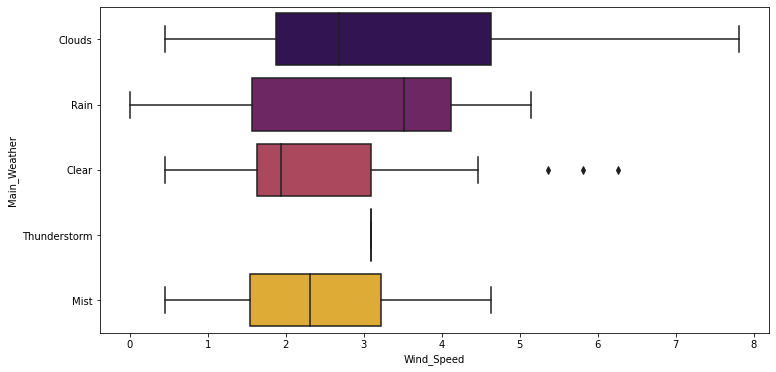

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot("Wind_Speed","Main_Weather",data=weather_data,palette="inferno")

Wind_Speed is almost same for clear and mist weather

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Min_Temp', ylabel='Main_Weather'>

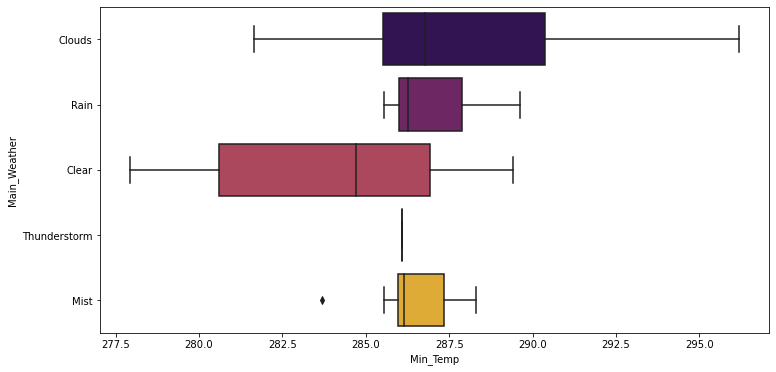

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot("Min_Temp","Main_Weather",data=weather_data,palette="inferno")

**Comparing Temperature hourly for each day**

<AxesSubplot:xlabel='Date'>

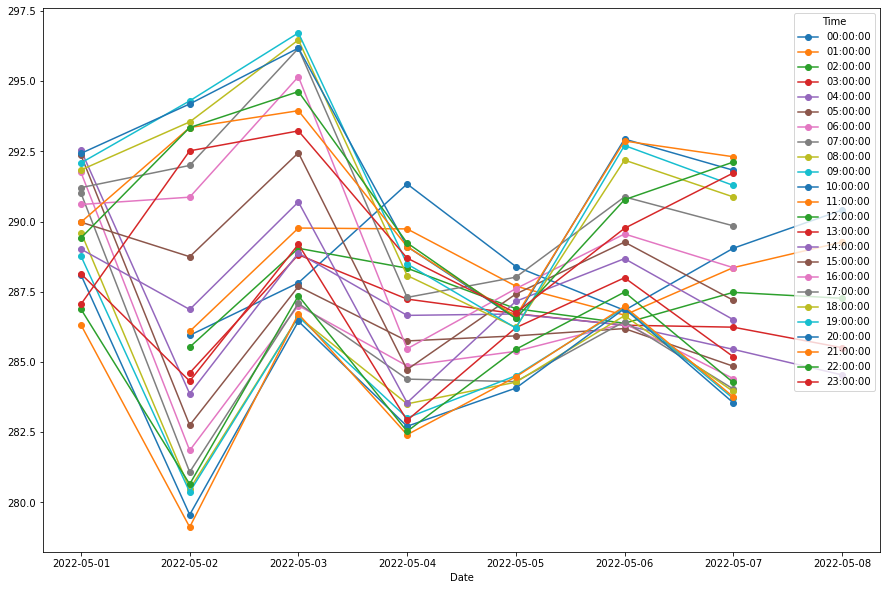

In [58]:
weather_data.groupby(['Date', 'Time']).sum().unstack().plot(kind='line',y='Temperature', marker='o',figsize=(15, 10))

Observations-

*  The lowest temperature on 1st May 2022 can be seen at 11 am, whereas the highest at 4 am
*  On 2nd May 2022, highest temperature can be seen at 7pm
*  On 3rd May 2022, lowest temperature can be seen at 10 am
*  On 4th May 2022, highest temperature can be seen at 12 am
*  On 5th May 2022, lowest temperature can be seen at 10 am
*  On 6th May 2022, lowest temperature can be seen at 3 am
*  On 7th May, highest temperature can be seen at 9 pm 

The above graph had many hours for each day. So, I have changed Time attribute to categorical. From 12 am to 6 am, I call it Early Morning. From 7am to 12pm, it is Morning. From 1pm to 6pm, I have categorized as Afternoon. Lastly, from 7pm to 11:59 pm its Night

In [13]:
weather_data["Time"] = pd.cut(
    pd.to_numeric(weather_data["Time"].astype(str).str[-8:-6]),
    bins=[0, 6, 12, 18, 24],
    labels=["Early Morning", "Morning", "Afternoon", "Night"],
    include_lowest=True
)


In [21]:
weather_data.head()

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,2022-05-01,Early Morning,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47,Clouds,overcast clouds
1,2022-05-01,Early Morning,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92,Clouds,overcast clouds
2,2022-05-01,Early Morning,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31,Clouds,overcast clouds
3,2022-05-01,Morning,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92,Rain,light rain
4,2022-05-01,Morning,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00,Clouds,scattered clouds


<AxesSubplot:xlabel='Date'>

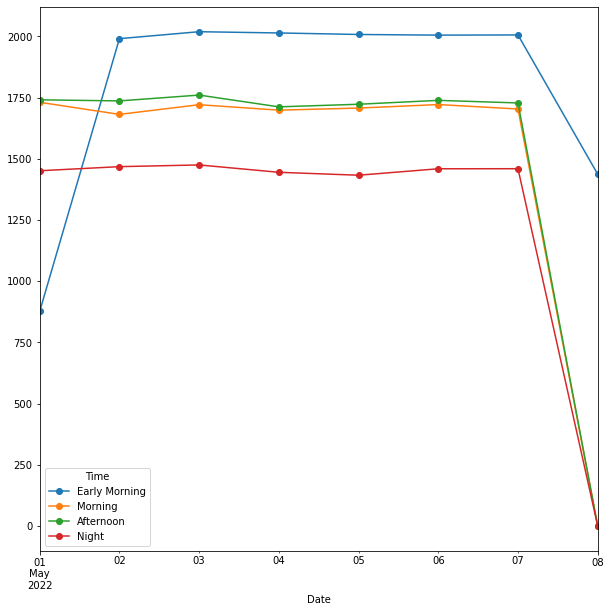

In [23]:
weather_data.groupby(['Date', 'Time']).sum().unstack().plot(kind='line',y='Temperature', marker='o')

This is the cummulative temperature for all timings in each category day wise. I can see we have higher temperature during early mornings and low temperature at nights

**Temperature Comparison for each category of Time daywise**

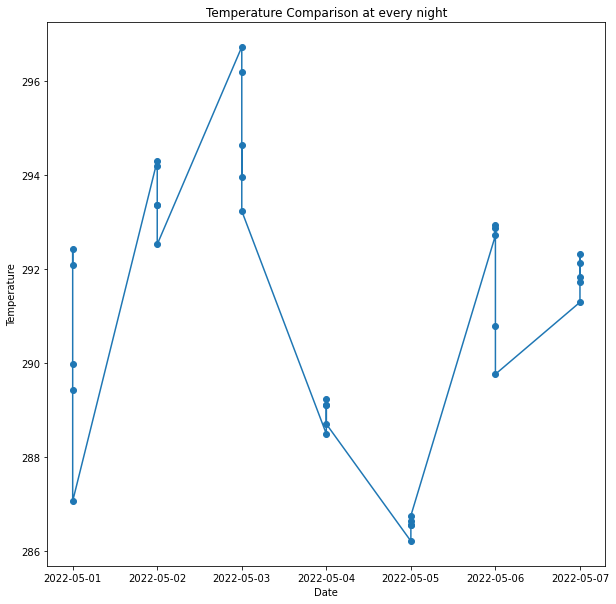

In [34]:
#plt.figure(figsize=(22,10))
weather_bin = weather_data[weather_data.Time == "Night"]
plt.plot(weather_bin['Date'], weather_bin['Temperature'],marker='o')
plt.title("Temperature Comparison at every night")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

At nights, 3rd May was relatively hotter and 5th May was relatively cooler

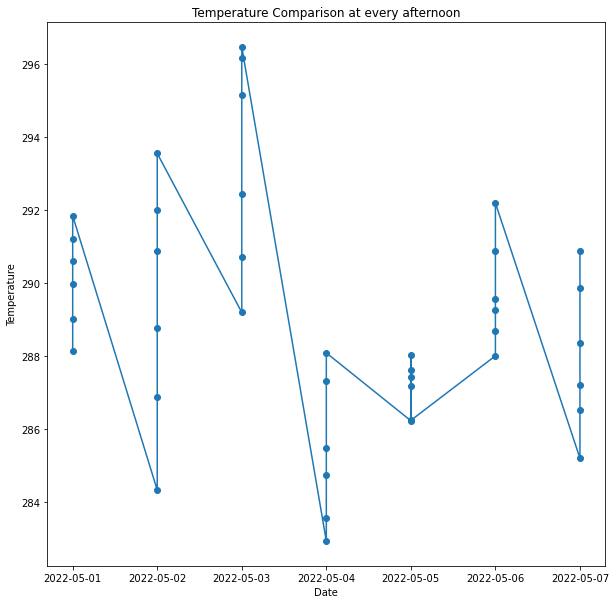

In [35]:
#plt.figure(figsize=(22,10))
weather_bin = weather_data[weather_data.Time == "Afternoon"]
plt.plot(weather_bin['Date'], weather_bin['Temperature'],marker='o')
plt.title("Temperature Comparison at every afternoon")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

At afternoons, 3rd May was relatively hotter and 4th May was relatively cooler

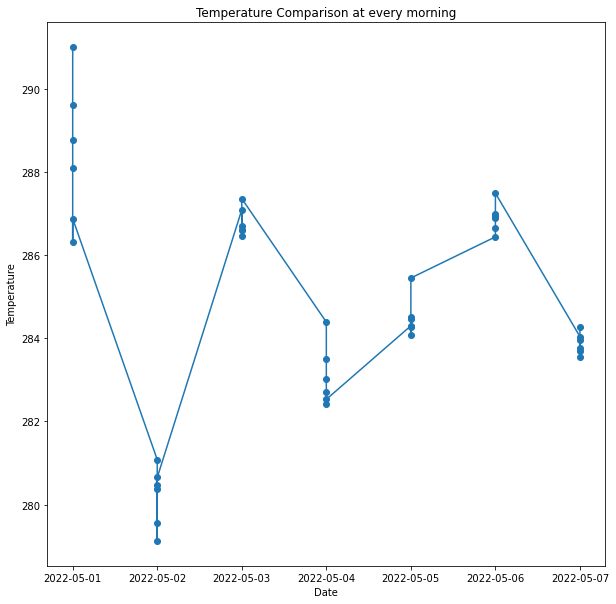

In [36]:
#plt.figure(figsize=(22,10))
weather_bin = weather_data[weather_data.Time == "Morning"]
plt.plot(weather_bin['Date'], weather_bin['Temperature'],marker='o')
plt.title("Temperature Comparison at every morning")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

At Mornings, 1st May was relatively hotter and 2nd May was relatively cooler

I plan to simplify dataset more. So, I have computed mean of temperature, humidity, pressure, Feels_like, Min_Temp, Max_Temp, Wind_Speed, Wind_Degree, Wind_Gust for each category of Time day wise. 

In [14]:
weather_data2 = weather_data.copy()

In [15]:
weather_data2.head()

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,2022-05-01,Early Morning,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47,Clouds,overcast clouds
1,2022-05-01,Early Morning,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92,Clouds,overcast clouds
2,2022-05-01,Early Morning,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31,Clouds,overcast clouds
3,2022-05-01,Morning,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92,Rain,light rain
4,2022-05-01,Morning,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00,Clouds,scattered clouds


In [40]:
weather_data.head()

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust,Main_Weather,Description
0,2022-05-01,Early Morning,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47,Clouds,overcast clouds
1,2022-05-01,Early Morning,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92,Clouds,overcast clouds
2,2022-05-01,Early Morning,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31,Clouds,overcast clouds
3,2022-05-01,Morning,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92,Rain,light rain
4,2022-05-01,Morning,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00,Clouds,scattered clouds


In [16]:
weather_data2.drop(columns=['Main_Weather', 'Description'])

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
0,2022-05-01,Early Morning,292.54,83,998,292.70,290.53,293.51,2.68,197,4.47
1,2022-05-01,Early Morning,292.36,85,998,292.56,290.53,293.65,2.68,192,4.92
2,2022-05-01,Early Morning,291.75,88,1007,291.96,290.16,292.95,6.71,221,14.31
3,2022-05-01,Morning,291.01,88,999,291.15,289.61,291.94,3.58,213,4.92
4,2022-05-01,Morning,289.61,87,1001,289.58,287.75,292.33,3.09,300,0.00
...,...,...,...,...,...,...,...,...,...,...,...
164,2022-05-08,Early Morning,290.41,53,1003,289.58,289.43,291.27,4.63,50,0.00
165,2022-05-08,Early Morning,289.27,51,1013,288.27,288.31,289.27,3.09,40,0.00
166,2022-05-08,Early Morning,287.27,54,1014,286.15,287.20,287.27,3.09,50,0.00
167,2022-05-08,Early Morning,285.51,67,999,284.55,285.27,286.09,0.45,36,1.79


In [17]:
# group by 'Date' and 'Time' and calculate the mean of 'Temperature'
temp_mean = weather_data2.groupby(['Date', 'Time'])['Temperature'].mean().reset_index()

In [43]:
temp_mean

,Date,Time,Temperature
0,2022-05-01,Early Morning,292.216667
1,2022-05-01,Morning,288.448333
2,2022-05-01,Afternoon,290.133333
3,2022-05-01,Night,290.196000
4,2022-05-02,Early Morning,284.378571
5,2022-05-02,Morning,280.208333
6,2022-05-02,Afternoon,289.393333
7,2022-05-02,Night,293.542000
8,2022-05-03,Early Morning,288.434286
9,2022-05-03,Morning,286.805000


In [18]:
# group by 'Date' and 'Time' and calculate the mean of 'Temperature'
humidity_mean = weather_data2.groupby(['Date', 'Time'])['Humidity'].mean().reset_index()

In [52]:
humidity_mean

,Date,Time,Humidity
0,2022-05-01,Early Morning,85.333333
1,2022-05-01,Morning,84.666667
2,2022-05-01,Afternoon,62.333333
3,2022-05-01,Night,63.800000
4,2022-05-02,Early Morning,83.714286
5,2022-05-02,Morning,89.833333
6,2022-05-02,Afternoon,63.833333
7,2022-05-02,Night,51.400000
8,2022-05-03,Early Morning,78.285714
9,2022-05-03,Morning,92.000000


In [19]:
# group by 'Date' and 'Time' and calculate the mean of 'Temperature'
pressure_mean = weather_data2.groupby(['Date', 'Time'])['Pressure'].mean().reset_index()

In [54]:
pressure_mean

,Date,Time,Pressure
0,2022-05-01,Early Morning,1001.000000
1,2022-05-01,Morning,1000.000000
2,2022-05-01,Afternoon,1002.333333
3,2022-05-01,Night,1012.600000
4,2022-05-02,Early Morning,1011.142857
5,2022-05-02,Morning,1007.833333
6,2022-05-02,Afternoon,1009.333333
7,2022-05-02,Night,1009.400000
8,2022-05-03,Early Morning,1006.857143
9,2022-05-03,Morning,1001.333333


In [20]:
# group by 'Date' and 'Time' and calculate the mean of 'Temperature'
feelslike_mean = weather_data2.groupby(['Date', 'Time'])['Feels_Like'].mean().reset_index()
# group by 'Date' and 'Time' and calculate the mean of 'Temperature'
minTemp_mean = weather_data2.groupby(['Date', 'Time'])['Min_Temp'].mean().reset_index()
# group by 'Date' and 'Time' and calculate the mean of 'Temperature'
maxTemp_mean = weather_data2.groupby(['Date', 'Time'])['Max_Temp'].mean().reset_index()
windspeed_mean = weather_data2.groupby(['Date', 'Time'])['Wind_Speed'].mean().reset_index()
windegree_mean = weather_data2.groupby(['Date', 'Time'])['Wind_Degree'].mean().reset_index()
windgust_mean = weather_data2.groupby(['Date', 'Time'])['Wind_Gust'].mean().reset_index()

**The final modified dataframe!**

In [21]:
merged_data = temp_mean.merge(humidity_mean, on=['Date', 'Time']).merge(pressure_mean, on=['Date', 'Time']).merge(feelslike_mean, on=['Date', 'Time']).merge(minTemp_mean, on=['Date', 'Time']).merge(maxTemp_mean, on=['Date', 'Time']).merge(windspeed_mean, on=['Date', 'Time']).merge(windegree_mean, on=['Date', 'Time']).merge(windgust_mean, on=['Date', 'Time'])


In [22]:
merged_data

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
0,2022-05-01,Early Morning,292.216667,85.333333,1001.000000,292.406667,290.406667,293.370000,4.023333,203.333333,7.900000
1,2022-05-01,Morning,288.448333,84.666667,1000.000000,288.245000,286.890000,290.085000,2.380000,246.333333,3.205000
2,2022-05-01,Afternoon,290.133333,62.333333,1002.333333,289.515000,289.163333,292.241667,5.215000,232.666667,8.940000
3,2022-05-01,Night,290.196000,63.800000,1012.600000,289.620000,290.048000,290.994000,6.562000,256.800000,11.832000
4,2022-05-02,Early Morning,284.378571,83.714286,1011.142857,283.685714,284.021429,284.857143,2.248571,274.857143,3.674286
5,2022-05-02,Morning,280.208333,89.833333,1007.833333,279.298333,278.778333,282.255000,1.631667,259.500000,2.065000
6,2022-05-02,Afternoon,289.393333,63.833333,1009.333333,288.740000,287.461667,291.603333,2.163333,240.833333,4.395000
7,2022-05-02,Night,293.542000,51.400000,1009.400000,292.978000,292.092000,295.130000,2.058000,185.000000,3.486000
8,2022-05-03,Early Morning,288.434286,78.285714,1006.857143,288.062857,287.972857,289.315714,1.651429,104.714286,2.992857
9,2022-05-03,Morning,286.805000,92.000000,1001.333333,286.628333,286.148333,287.706667,2.631667,114.666667,1.713333


Removing rows with NaN values

In [23]:
merged_data.dropna(inplace=True)

In [24]:
merged_data

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
0,2022-05-01,Early Morning,292.216667,85.333333,1001.000000,292.406667,290.406667,293.370000,4.023333,203.333333,7.900000
1,2022-05-01,Morning,288.448333,84.666667,1000.000000,288.245000,286.890000,290.085000,2.380000,246.333333,3.205000
2,2022-05-01,Afternoon,290.133333,62.333333,1002.333333,289.515000,289.163333,292.241667,5.215000,232.666667,8.940000
3,2022-05-01,Night,290.196000,63.800000,1012.600000,289.620000,290.048000,290.994000,6.562000,256.800000,11.832000
4,2022-05-02,Early Morning,284.378571,83.714286,1011.142857,283.685714,284.021429,284.857143,2.248571,274.857143,3.674286
5,2022-05-02,Morning,280.208333,89.833333,1007.833333,279.298333,278.778333,282.255000,1.631667,259.500000,2.065000
6,2022-05-02,Afternoon,289.393333,63.833333,1009.333333,288.740000,287.461667,291.603333,2.163333,240.833333,4.395000
7,2022-05-02,Night,293.542000,51.400000,1009.400000,292.978000,292.092000,295.130000,2.058000,185.000000,3.486000
8,2022-05-03,Early Morning,288.434286,78.285714,1006.857143,288.062857,287.972857,289.315714,1.651429,104.714286,2.992857
9,2022-05-03,Morning,286.805000,92.000000,1001.333333,286.628333,286.148333,287.706667,2.631667,114.666667,1.713333


In [26]:
# set the date column as the index
merged_data.set_index("Date", inplace=True)

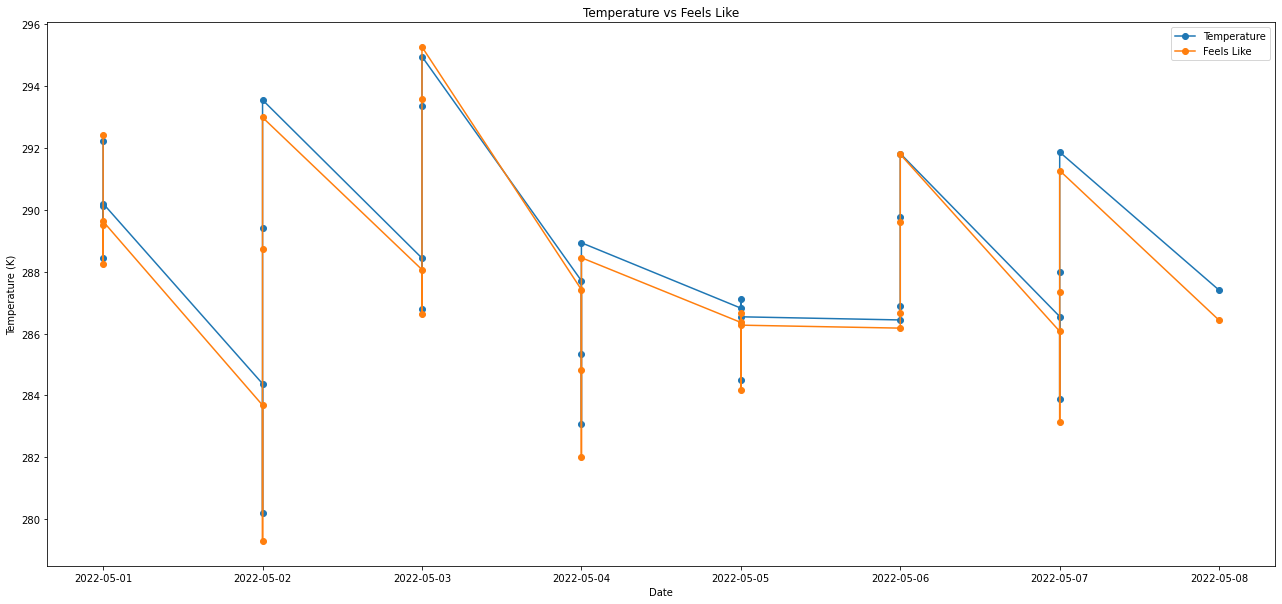

In [29]:
plt.figure(figsize=(22,10))
plt.plot(merged_data["Temperature"], label="Temperature",marker='o')
plt.plot(merged_data["Feels_Like"], label="Feels Like",marker='o')
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs Feels Like")
plt.legend()
plt.show()

The graph shows that there is less difference between Temperature and Feels_Like

I am creating subsets of dataframe. Each subset has a fixed time category with different dates and corresponding mean values of its features

**Morning Data**

In [33]:
weather_bin = merged_data[merged_data.Time == "Morning"]

In [34]:
weather_bin

,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
Date,,,,,,,,,,
2022-05-01,Morning,288.448333,84.666667,1000.000000,288.245000,286.890000,290.085000,2.380000,246.333333,3.205000
2022-05-02,Morning,280.208333,89.833333,1007.833333,279.298333,278.778333,282.255000,1.631667,259.500000,2.065000
2022-05-03,Morning,286.805000,92.000000,1001.333333,286.628333,286.148333,287.706667,2.631667,114.666667,1.713333
2022-05-04,Morning,283.093333,88.000000,1008.333333,282.026667,281.903333,284.263333,2.440000,276.333333,3.500000
2022-05-05,Morning,284.513333,94.333333,1017.666667,284.168333,284.291667,284.848333,2.170000,90.666667,5.555000
2022-05-06,Morning,286.898333,89.166667,997.166667,286.656667,286.041667,287.611667,1.046667,112.333333,0.941667
2022-05-07,Morning,283.878333,81.666667,998.833333,283.138333,283.050000,284.838333,4.758333,180.500000,2.608333


In [37]:
print(weather_bin.columns)

Index(['Time', 'Temperature', 'Humidity', 'Pressure', 'Feels_Like', 'Min_Temp',
       'Max_Temp', 'Wind_Speed', 'Wind_Degree', 'Wind_Gust'],
      dtype='object')


In [41]:
weather_bin2 = weather_bin.reset_index()


In [42]:
weather_bin2

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
0,2022-05-01,Morning,288.448333,84.666667,1000.000000,288.245000,286.890000,290.085000,2.380000,246.333333,3.205000
1,2022-05-02,Morning,280.208333,89.833333,1007.833333,279.298333,278.778333,282.255000,1.631667,259.500000,2.065000
2,2022-05-03,Morning,286.805000,92.000000,1001.333333,286.628333,286.148333,287.706667,2.631667,114.666667,1.713333
3,2022-05-04,Morning,283.093333,88.000000,1008.333333,282.026667,281.903333,284.263333,2.440000,276.333333,3.500000
4,2022-05-05,Morning,284.513333,94.333333,1017.666667,284.168333,284.291667,284.848333,2.170000,90.666667,5.555000
5,2022-05-06,Morning,286.898333,89.166667,997.166667,286.656667,286.041667,287.611667,1.046667,112.333333,0.941667
6,2022-05-07,Morning,283.878333,81.666667,998.833333,283.138333,283.050000,284.838333,4.758333,180.500000,2.608333


In [49]:
weather_bin2 = weather_bin2.reset_index()

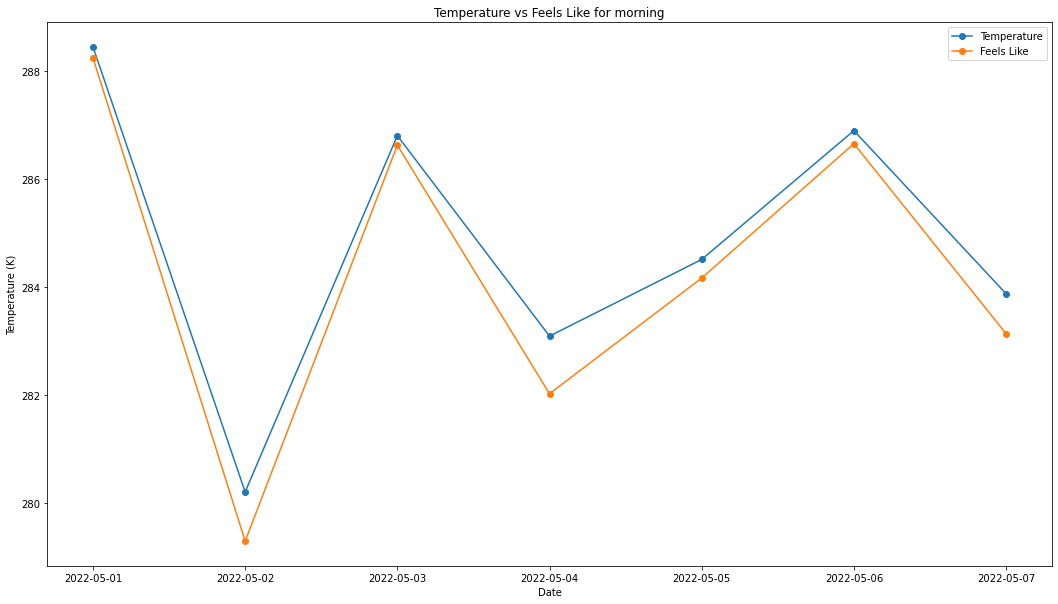

In [50]:
plt.figure(figsize=(18,10))
weather_bin2.set_index("Date", inplace=True)
plt.plot(weather_bin2["Temperature"], label="Temperature",marker='o')
plt.plot(weather_bin2["Feels_Like"], label="Feels Like",marker='o')
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs Feels Like for morning")
plt.legend()
plt.show()

**Afternoon Data**

In [51]:
weather_bin = merged_data[merged_data.Time == "Afternoon"]

In [52]:
weather_bin3 = weather_bin.reset_index()

In [53]:
weather_bin3

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
0,2022-05-01,Afternoon,290.133333,62.333333,1002.333333,289.515000,289.163333,292.241667,5.215000,232.666667,8.940000
1,2022-05-02,Afternoon,289.393333,63.833333,1009.333333,288.740000,287.461667,291.603333,2.163333,240.833333,4.395000
2,2022-05-03,Afternoon,293.356667,82.166667,1000.166667,293.578333,292.146667,294.880000,5.371667,174.000000,8.848333
3,2022-05-04,Afternoon,285.341667,81.166667,1011.166667,284.818333,284.183333,286.178333,1.836667,140.000000,2.235000
4,2022-05-05,Afternoon,287.110000,80.500000,1009.333333,286.663333,286.193333,288.181667,3.790000,142.333333,0.893333
5,2022-05-06,Afternoon,289.763333,81.833333,994.166667,289.616667,288.505000,291.593333,2.573333,173.333333,0.000000
6,2022-05-07,Afternoon,287.998333,69.000000,1001.166667,287.341667,286.958333,289.143333,4.688333,82.000000,8.765000


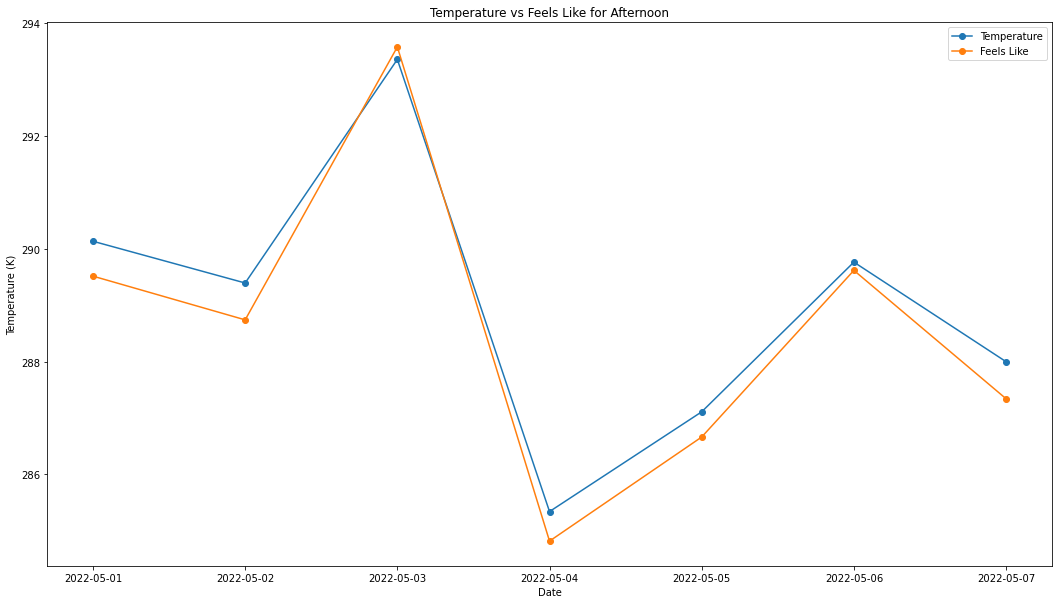

In [54]:
plt.figure(figsize=(18,10))
weather_bin3.set_index("Date", inplace=True)
plt.plot(weather_bin3["Temperature"], label="Temperature",marker='o')
plt.plot(weather_bin3["Feels_Like"], label="Feels Like",marker='o')
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs Feels Like for Afternoon")
plt.legend()
plt.show()

**Night Data**

In [58]:
weather_bin = merged_data[merged_data.Time == "Night"]

In [59]:
weather_bin4 = weather_bin.reset_index()

In [60]:
weather_bin4

,Date,Time,Temperature,Humidity,Pressure,Feels_Like,Min_Temp,Max_Temp,Wind_Speed,Wind_Degree,Wind_Gust
0,2022-05-01,Night,290.196,63.8,1012.6,289.620,290.048,290.994,6.562,256.8,11.832
1,2022-05-02,Night,293.542,51.4,1009.4,292.978,292.092,295.130,2.058,185.0,3.486
2,2022-05-03,Night,294.942,79.6,1003.8,295.254,293.810,296.472,6.688,245.4,11.604
3,2022-05-04,Night,288.930,72.2,1012.0,288.448,287.678,289.824,1.182,65.8,1.164
4,2022-05-05,Night,286.540,89.4,1004.6,286.270,285.716,288.598,3.726,98.8,0.894
5,2022-05-06,Night,291.812,78.6,992.8,291.786,290.076,293.684,3.156,345.2,1.432
6,2022-05-07,Night,291.856,56.6,1006.4,291.260,290.572,292.798,4.414,28.0,7.320


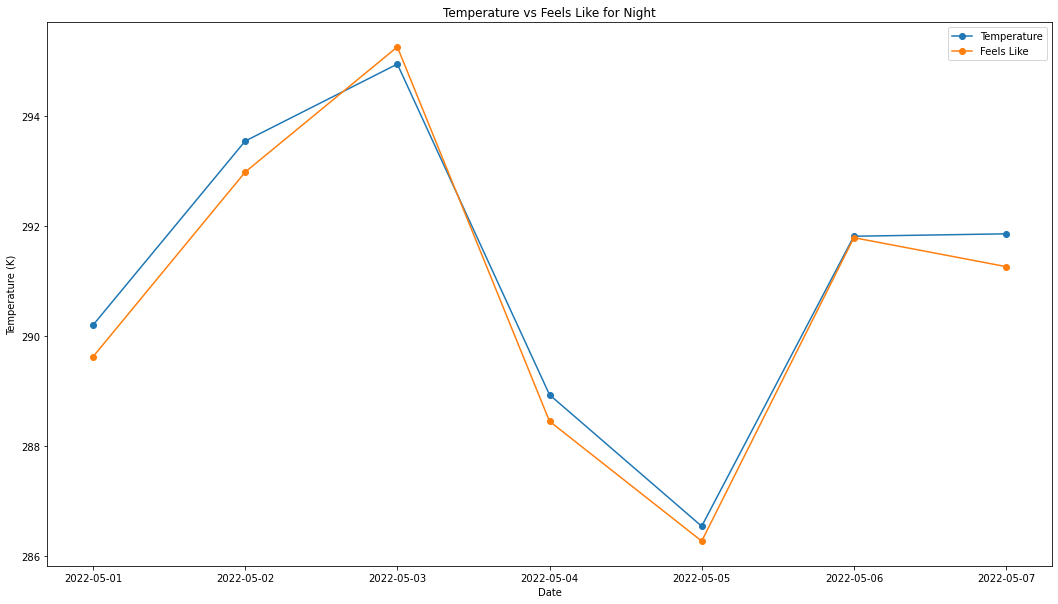

In [62]:
plt.figure(figsize=(18,10))
weather_bin4.set_index("Date", inplace=True)
plt.plot(weather_bin4["Temperature"], label="Temperature",marker='o')
plt.plot(weather_bin4["Feels_Like"], label="Feels Like",marker='o')
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs Feels Like for Night")
plt.legend()
plt.show()

Plot of Wind_Speed for each time category date wise

<AxesSubplot:xlabel='Date'>

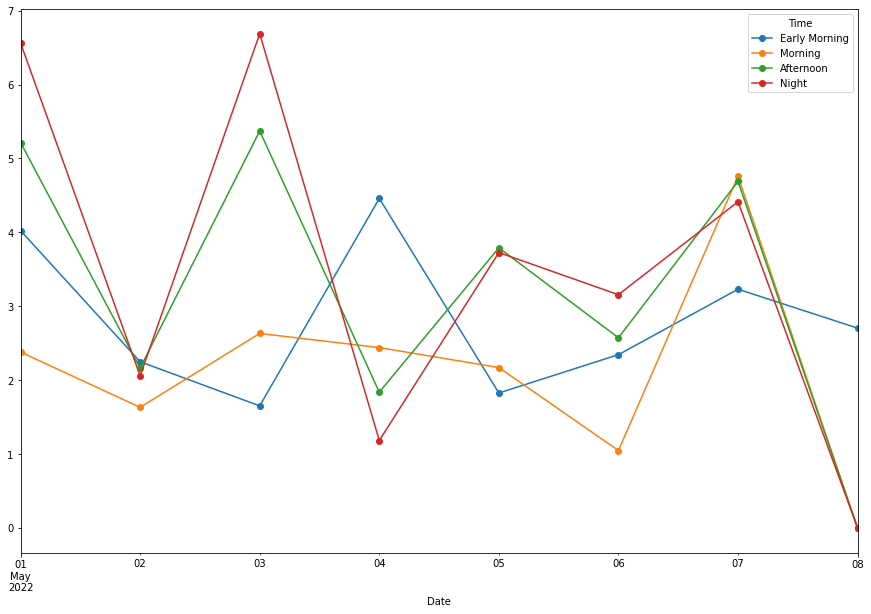

In [63]:
merged_data.groupby(['Date', 'Time']).sum().unstack().plot(kind='line',y='Wind_Speed', marker='o',figsize=(15, 10))

We observe that Wind_Speed is low during Morning on 1st, 2nd, 6th May. Wind_Speed was high at night on 1st and 3rd May. On the contrary, we see relatively higher wind speed in morning which is not the case on other dates.

I have plotted similar plots for Wind_Gust

<AxesSubplot:xlabel='Date'>

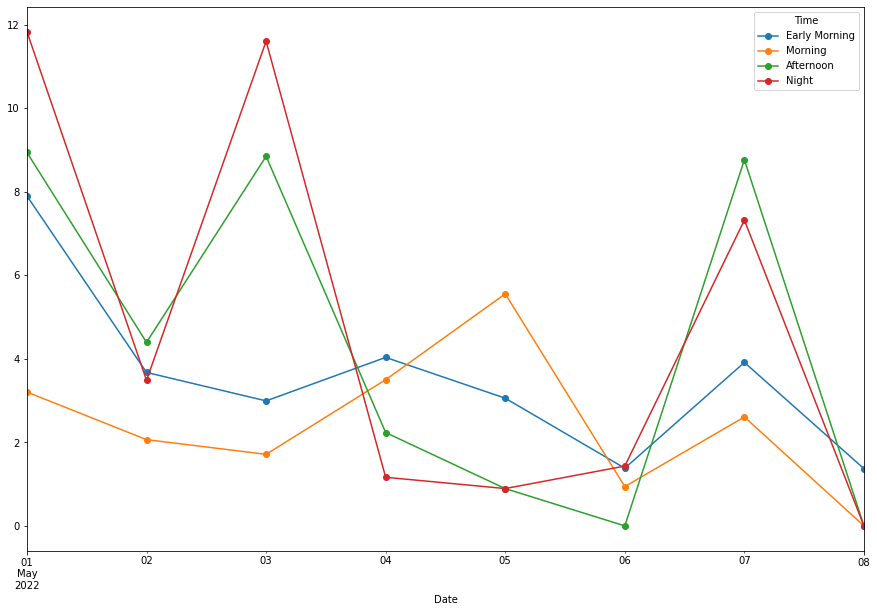

In [64]:
merged_data.groupby(['Date', 'Time']).sum().unstack().plot(kind='line',y='Wind_Gust', marker='o',figsize=(15, 10))

Now, I conclude my project. So, these were the observations on past weather data for 1st week of May month.

Future Scope - Do weather forecasting and time series analysis